In [58]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
credit_df = pd.read_csv('credit_risk_dataset.csv')
credit_df.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [60]:
nulls = credit_df.isnull().sum().sort_values(ascending=False)
nulls

loan_int_rate                 3116
person_emp_length              895
cb_person_cred_hist_length       0
cb_person_default_on_file        0
loan_percent_income              0
loan_status                      0
loan_amnt                        0
loan_grade                       0
loan_intent                      0
person_home_ownership            0
person_income                    0
person_age                       0
dtype: int64

In [61]:
credit_df.shape

(32581, 12)

In [62]:
for value in credit_df['loan_status']:
    credit_df['loan_status'].replace(0,"No Default",inplace=True)
    credit_df['loan_status'].replace(1, "Default", inplace=True)

In [74]:
bins = [0,25,40,55,70]
labels = ['Under 25','25-40','40-55','55-70']
credit_df['Age Group'] = pd.cut(credit_df['person_age'],bins=bins,labels=labels,right=False)

In [75]:
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Age Group
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,Default,0.59,Y,3,Under 25
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,No Default,0.10,N,2,Under 25
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,Default,0.57,N,3,25-40
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,Default,0.53,N,2,Under 25
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,Default,0.55,Y,4,Under 25


In [63]:
#credit_df.sort_values(by='person_age',ascending=True,inplace=True)

In [64]:
credit_df['loan_int_rate'] = credit_df['loan_int_rate'].dropna()
credit_df['person_emp_length'] = credit_df['person_emp_length'].dropna()

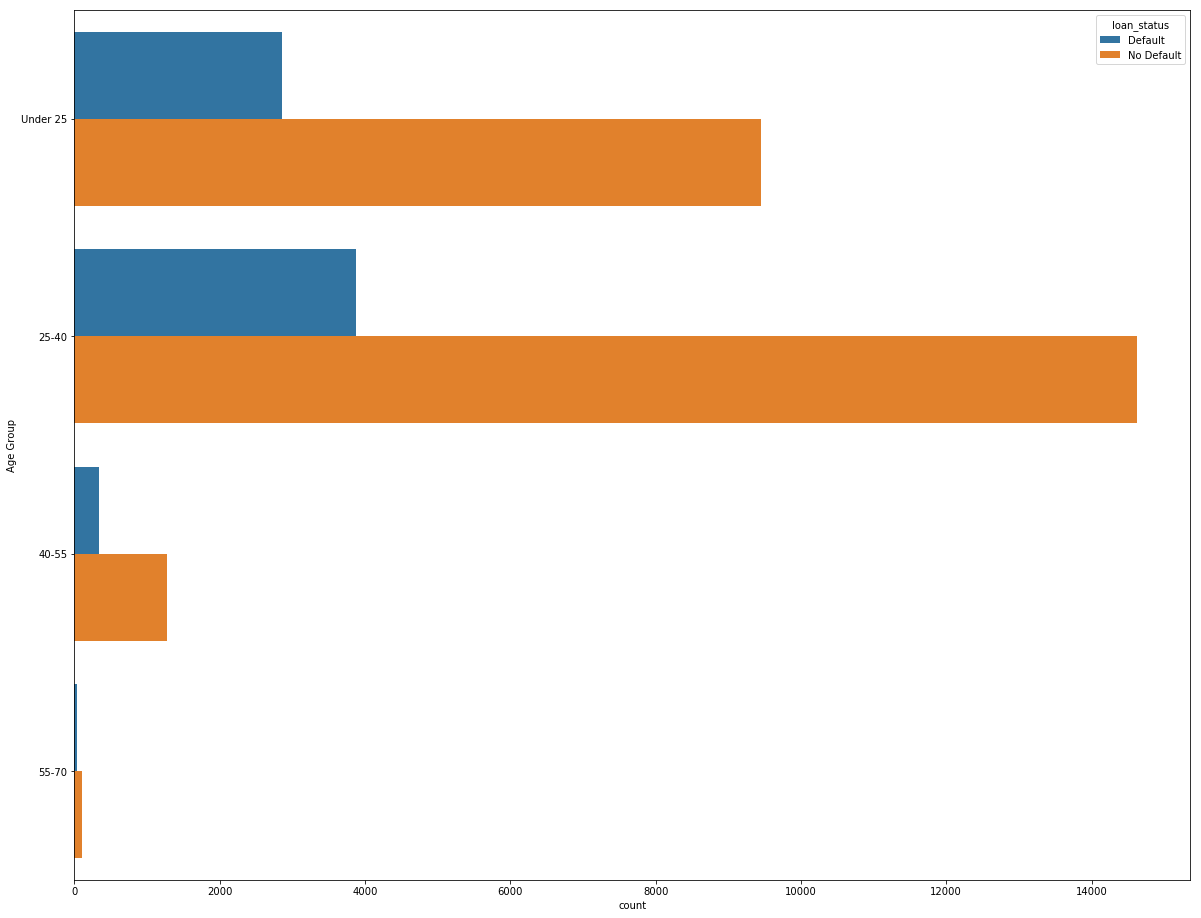

In [76]:
#age_plot = sns.countplot(y='person_age',hue='loan_status', data=credit_df)

fig_dims = (20, 16)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = "Age Group", hue='loan_status', ax=ax, data=credit_df)

In [54]:
credit_df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                    object
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

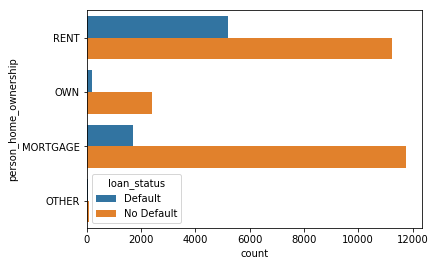

In [10]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = "person_home_ownership", hue='loan_status', ax=ax, data=credit_df)

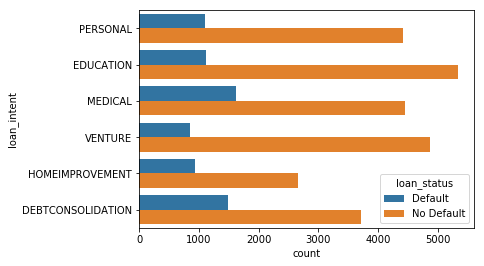

In [20]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = "loan_intent", hue='loan_status', ax=ax, data=credit_df)

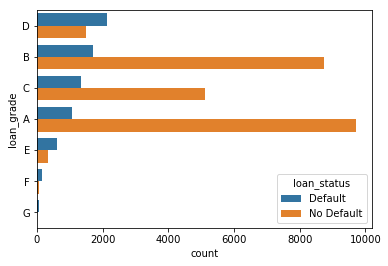

In [21]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = "loan_grade", hue='loan_status', ax=ax, data=credit_df)

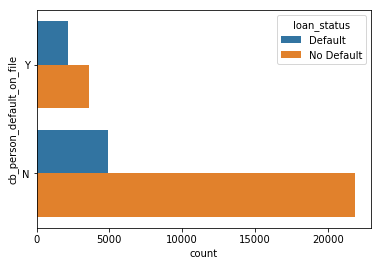

In [35]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = "cb_person_default_on_file", hue='loan_status', ax=ax, data=credit_df)